In [1]:
import os, os.path, sys, time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


In [37]:
def evaluate(model_dirs,tags,verbose):
    print
    data={}
    for model_dir in model_dirs:
        if verbose: print("----------{}".format(model_dir.split('/')[-1]))
        ## PARSE HOSTING COMPUTER
        try:
                hosts=[ ef.split('.')[4] for td in [model_dir+'/'+d for d in os.listdir(model_dir) if d.endswith('_train')] for ef in os.listdir(td) if 'events' in ef]

        except:
            print 'failed to read hosts in ',model_dir
            pass
        else:
            if verbose: print 'hosts: ',hosts

        data[model_dir]={t:[] for t in tags}
        ## PARSE TAG INFORMATION FROM xterm_python
        x_files=sorted([f for f in os.listdir(model_dir) if f.startswith('xterm_python')])
        for x_file in x_files:
            if verbose: print x_file
            with open(model_dir+'/'+x_file,'r') as f:
                lines=f.readlines()
            for t in tags:
                try:
                    data[model_dir][t].extend([float(p.split(':')[1]) for l in lines for p in l.split(',') if t in p])
                except: pass
        ## PARSE NUMBER OF SUCCESSES OF LAST 10 RUNS 
        try:
            with open(model_dir+'/'+[d for d in os.listdir(model_dir) if d.endswith('_train') and os.path.isfile(model_dir+'/'+d+'/log')][-1]+'/log','r') as logfile:
                success=0
                success=sum([line=='success \n' for line in logfile.readlines()[-10:]])
        except:
            print 'failed to read log file in ',model_dir
            pass
        else:
            if verbose: print 'success: ',success,'/10'
        if len(data[model_dir][tags[0]])==0:  del data[model_dir]
        print
    if len(data.keys())==0:
        print("No data for {0}".format(model_dirs))
        return
    # Plot the data for each tag
    colors=['b', 'g', 'r', 'c', 'm', 'y', 'k']
    plt.figure(figsize=(6,len(tags)*3))
    lengths={t:min([len(data[model_dir][t]) for model_dir in data.keys()]) for t in tags}
    for index, t in enumerate(tags):
        plt.subplot(len(tags),1, index+1)
        plt.title(t)
        patches=[]
        for mindex, model_dir in enumerate(data.keys()):
            plt.plot(data[model_dir][t][:lengths[t]],color=colors[mindex%len(colors)])
            patches.append(mpatches.Patch(color=colors[mindex%len(colors)], label=model_dir.split('/')[-1]))
        plt.legend(handles=patches,bbox_to_anchor=(1.1, 1.05))
    plt.tight_layout()
    
    if verbose: print 'done'

Evaluating models:['model_tdreplay_1', 'model_tdreplay_2', 'model_tdreplay_3']






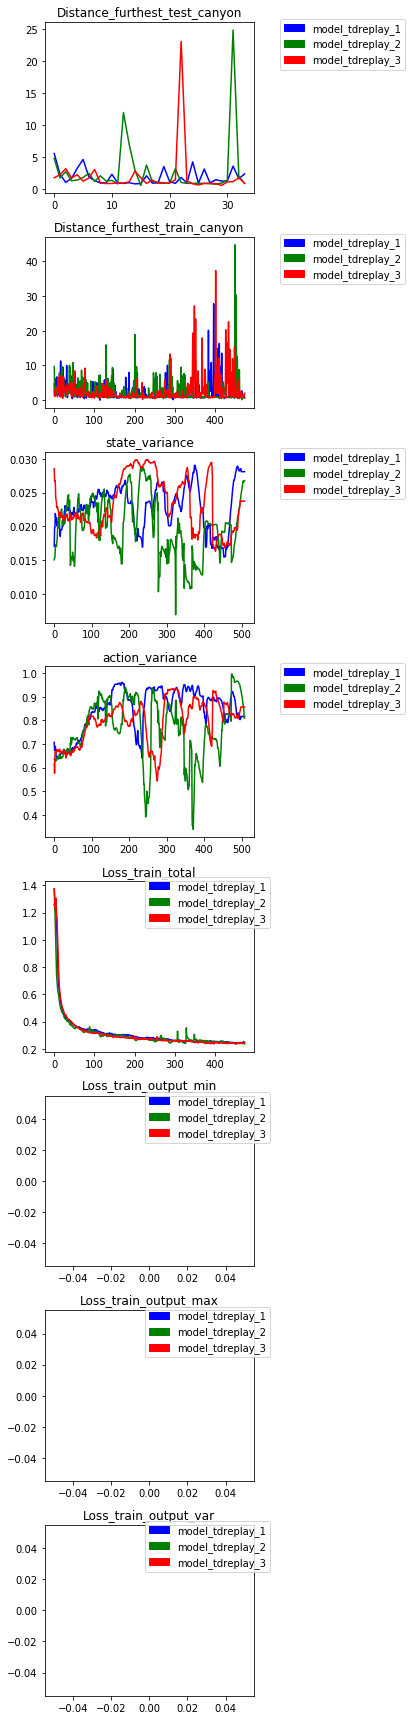

In [53]:
# ONLINE EVALUATION PARAMETER SEARCH
root_dir='/esat/opal/kkelchte/docker_home/tensorflow/log/on_depth_turtle'
# model_dirs=sorted([root_dir+'/'+d for d in os.listdir(root_dir) if "model" in d and('tdreplay' in d or 'actreplay' in d or 'ref' in d)])
# model_dirs=sorted([root_dir+'/'+d for d in os.listdir(root_dir) if "model" in d and '_1' in d and ('tdreplay' in d or 'ref5000' in d) and not 'priokeep' in d ])
# model_dirs=sorted([root_dir+'/'+d for d in os.listdir(root_dir) if "model" in d and 'sttvar' in d and not '_priokeep' in d])
# model_dirs=sorted([root_dir+'/'+d for d in os.listdir(root_dir) if "model" in d and ('ref2' in d and not '_1' in d)])
# model_dirs=sorted([root_dir+'/'+d for d in os.listdir(root_dir) if "model" in d and 'eps1_' in d ])
model_dirs=sorted([root_dir+'/'+d for d in os.listdir(root_dir) if "model" in d and 'tdreplay' in d ])
print('Evaluating models:'+str(sorted([os.path.basename(model) for model in model_dirs])))
# uncomment to see possible tags
# with open([root_dir+'/'+os.path.basename(model_dirs[0])+'/'+r for r in os.listdir(root_dir+'/'+os.path.basename(model_dirs[0])) if r.startswith('2018') and r.endswith('train') and os.path.isfile(root_dir+'/'+os.path.basename(model_dirs[0])+'/'+r+'/tf_log')][0]+'/tf_log','r') as log_file:
#     tags=[]
#     for line in log_file.readlines(): tags.extend([ e.split(':')[0][1:] for e in line.split(',')if e.split(':')[0][1:] not in tags][1:])
#     print "Tags: ",tags
tags=['Distance_furthest_test_canyon','Distance_furthest_train_canyon', 'state_variance', 'action_variance', 'Loss_train_total', 
      'Loss_train_output_min', 'Loss_train_output_max', 'Loss_train_output_var']
# tags=['Distance_furthest_train_canyon','Loss_train_total','state_variance']
# tags=['Distance_furthest_train_canyon','Distance_furthest_test_canyon','Loss_train_total','state_variance']
evaluate(model_dirs,tags,False)


Evaluating models:['model_eps03_1', 'model_eps03_2', 'model_eps03_3']




Evaluating models:['model_eps05_1', 'model_eps05_2', 'model_eps05_3']






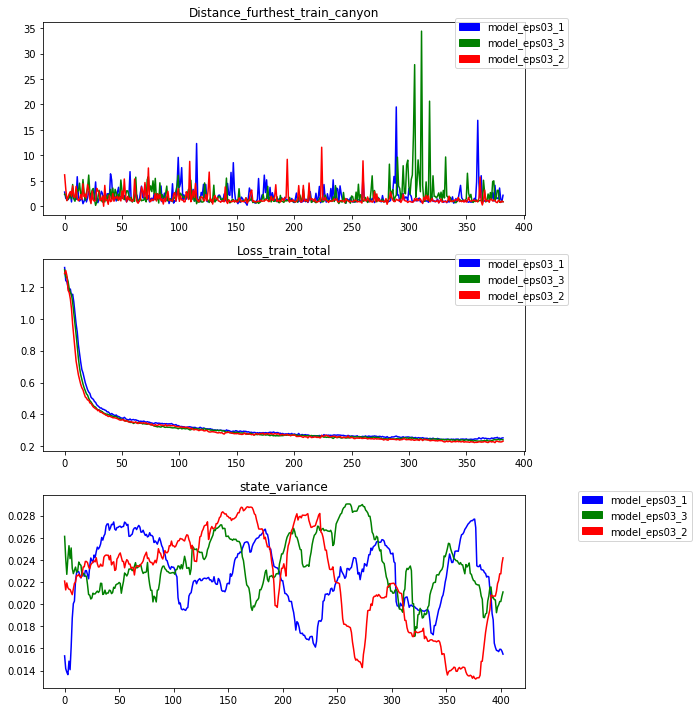

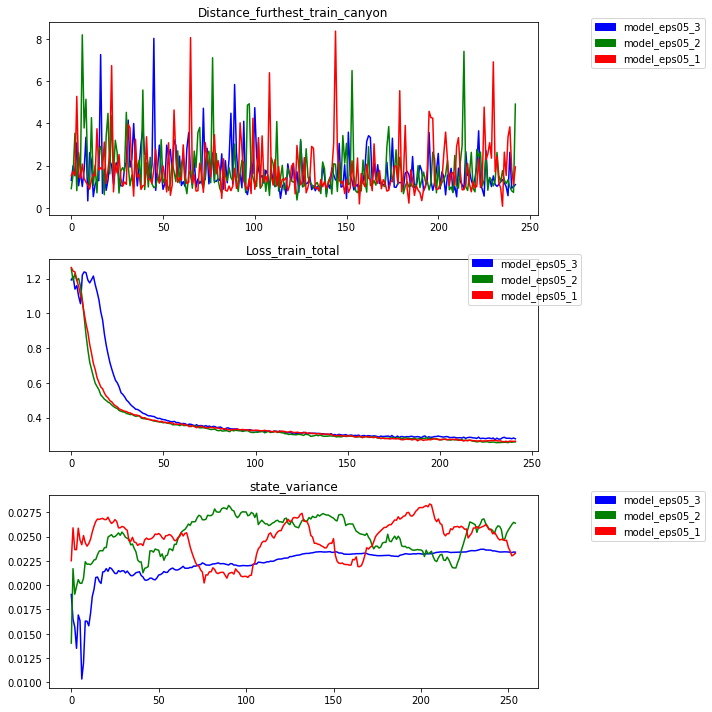

In [53]:
# root_dir='/esat/opal/kkelchte/docker_home/tensorflow/log/on_depth_turtle'
# model_dirs=sorted([root_dir+'/'+d for d in os.listdir(root_dir) if "model" in d and 'ref5000' in d])
# print('Evaluating models:'+str(sorted([os.path.basename(model) for model in model_dirs])))
# tags=['Distance_furthest_train_canyon','Loss_train_total','state_variance']
# evaluate(model_dirs,tags,False)

# root_dir='/esat/opal/kkelchte/docker_home/tensorflow/log/on_depth_turtle'
# model_dirs=sorted([root_dir+'/'+d for d in os.listdir(root_dir) if "model" in d and 'sttvar_priokeep' in d])
# print('Evaluating models:'+str(sorted([os.path.basename(model) for model in model_dirs])))
# tags=['Distance_furthest_train_canyon','Loss_train_total','state_variance']
# evaluate(model_dirs,tags,False)

# root_dir='/esat/opal/kkelchte/docker_home/tensorflow/log/on_depth_turtle'
# model_dirs=sorted([root_dir+'/'+d for d in os.listdir(root_dir) if "model" in d and 'sttvar' in d and not '_priokeep' in d])
# print('Evaluating models:'+str(sorted([os.path.basename(model) for model in model_dirs])))
# tags=['Distance_furthest_train_canyon','Loss_train_total','state_variance']
# evaluate(model_dirs,tags,False)

# root_dir='/esat/opal/kkelchte/docker_home/tensorflow/log/on_depth_turtle'
# model_dirs=sorted([root_dir+'/'+d for d in os.listdir(root_dir) if "model" in d and 'actvar' in d])
# print('Evaluating models:'+str(sorted([os.path.basename(model) for model in model_dirs])))
# tags=['Distance_furthest_train_canyon','Loss_train_total','state_variance']
# evaluate(model_dirs,tags,False)

# root_dir='/esat/opal/kkelchte/docker_home/tensorflow/log/on_depth_turtle'
# model_dirs=sorted([root_dir+'/'+d for d in os.listdir(root_dir) if "model" in d and 'trgtvar' in d])
# print('Evaluating models:'+str(sorted([os.path.basename(model) for model in model_dirs])))
# tags=['Distance_furthest_train_canyon','Loss_train_total','state_variance']
# evaluate(model_dirs,tags,False)

# root_dir='/esat/opal/kkelchte/docker_home/tensorflow/log/on_depth_turtle'
# model_dirs=sorted([root_dir+'/'+d for d in os.listdir(root_dir) if "model" in d and 'rndact' in d and not '_priokeep' in d])
# print('Evaluating models:'+str(sorted([os.path.basename(model) for model in model_dirs])))
# tags=['Distance_furthest_train_canyon','Loss_train_total','state_variance']
# evaluate(model_dirs,tags,False)

# root_dir='/esat/opal/kkelchte/docker_home/tensorflow/log/on_depth_turtle'
# model_dirs=sorted([root_dir+'/'+d for d in os.listdir(root_dir) if "model" in d and 'rndact_priokeep' in d])
# print('Evaluating models:'+str(sorted([os.path.basename(model) for model in model_dirs])))
# tags=['Distance_furthest_train_canyon','Loss_train_total','state_variance']
# evaluate(model_dirs,tags,False)

# root_dir='/esat/opal/kkelchte/docker_home/tensorflow/log/on_depth_turtle'
# model_dirs=sorted([root_dir+'/'+d for d in os.listdir(root_dir) if "model" in d and 'ref' in d and not '5000' in d])
# print('Evaluating models:'+str(sorted([os.path.basename(model) for model in model_dirs])))
# tags=['Distance_furthest_train_canyon','Loss_train_total','state_variance']
# evaluate(model_dirs,tags,False)

# root_dir='/esat/opal/kkelchte/docker_home/tensorflow/log/on_depth_turtle'
# model_dirs=sorted([root_dir+'/'+d for d in os.listdir(root_dir) if "model" in d and 'tdreplay' in d])
# print('Evaluating models:'+str(sorted([os.path.basename(model) for model in model_dirs])))
# tags=['Distance_furthest_train_canyon','Loss_train_total','state_variance']
# evaluate(model_dirs,tags,False)

# root_dir='/esat/opal/kkelchte/docker_home/tensorflow/log/on_depth_turtle'
# model_dirs=sorted([root_dir+'/'+d for d in os.listdir(root_dir) if "model" in d and 'gs50' in d and not '5000' in d])
# print('Evaluating models:'+str(sorted([os.path.basename(model) for model in model_dirs])))
# tags=['Distance_furthest_train_canyon','Loss_train_total','state_variance']
# evaluate(model_dirs,tags,False)

# root_dir='/esat/opal/kkelchte/docker_home/tensorflow/log/on_depth_turtle'
# model_dirs=sorted([root_dir+'/'+d for d in os.listdir(root_dir) if "model" in d and 'gs100' in d and not '5000' in d])
# print('Evaluating models:'+str(sorted([os.path.basename(model) for model in model_dirs])))
# tags=['Distance_furthest_train_canyon','Loss_train_total','state_variance']
# evaluate(model_dirs,tags,False)


root_dir='/esat/opal/kkelchte/docker_home/tensorflow/log/on_depth_turtle'
model_dirs=sorted([root_dir+'/'+d for d in os.listdir(root_dir) if "model" in d and 'eps03' in d])
print('Evaluating models:'+str(sorted([os.path.basename(model) for model in model_dirs])))
tags=['Distance_furthest_train_canyon','Loss_train_total','state_variance']
evaluate(model_dirs,tags,False)


root_dir='/esat/opal/kkelchte/docker_home/tensorflow/log/on_depth_turtle'
model_dirs=sorted([root_dir+'/'+d for d in os.listdir(root_dir) if "model" in d and 'eps05' in d])
print('Evaluating models:'+str(sorted([os.path.basename(model) for model in model_dirs])))
tags=['Distance_furthest_train_canyon','Loss_train_total','state_variance']
evaluate(model_dirs,tags,False)

['tyl']

In [21]:
### EXTRACT MODELDIRS FROM TF/LOG
# directory containing tensorflow log
# root_dir='/esat/opal/kkelchte/docker_home/tensorflow/log'
root_dir='/esat/opal/kkelchte/docker_home/tensorflow/log'
# define which models to evaluate
# model_dirs=[root_dir+'/'+d for d in os.listdir(root_dir) if (d.startswith('gridsearch_depth_lr') and d.endswith('_0'))or d.startswith('gridsearch_normreplay_depth_lr')]
model_dirs=[root_dir+'/'+d for d in os.listdir(root_dir) if (d.startswith('gridsearch_coll_lr') and d.endswith('_0'))or d.startswith('gridsearch_gradmul_coll_lr')]
models=sorted([os.path.basename(model) for model in model_dirs])
print('Evaluating models:')
for model in models:print(model)
print
print('Possible info_tags:')
m=models[1]
with open([root_dir+'/'+m+'/'+r for r in os.listdir(root_dir+'/'+m) if r.startswith('2018') and r.endswith('train') and os.path.isfile(root_dir+'/'+m+'/'+r+'/tf_log')][0]+'/tf_log','r') as log_file:
    print [e.split(':')[0][1:] for e in log_file.readlines()[2].split(',')]

Evaluating models:
gridsearch_coll_lr00001_eps05_bf1000_0
gridsearch_coll_lr0001_eps001_bf10000_0
gridsearch_coll_lr0001_eps001_bf1000_0
gridsearch_coll_lr0001_eps01_bf1000_0
gridsearch_coll_lr0001_eps05_bf1000_0
gridsearch_coll_lr001_eps01_bf1000_0
gridsearch_coll_lr001_eps05_bf10000_0
gridsearch_coll_lr001_eps05_bf1000_0
gridsearch_gradmul_coll_lr0001_eps001_bf1000
gridsearch_gradmul_coll_lr0001_eps001_bf10000
gridsearch_gradmul_coll_lr0001_eps05_bf1000
gridsearch_gradmul_coll_lr001_eps05_bf1000
gridsearch_gradmul_coll_lr001_eps05_bf10000

Possible info_tags:
['8', 'Distance_current_train_canyon', 'Distance_furthest_train_canyon', 'Loss_train_total', 'Loss_train_output', 'delays']


In [22]:
### PARSE ALL INFORMATION FOR EACH RUN:
information={m:{} for m in models}
info_tags=['Distance_furthest_train_canyon', 'Loss_train_total']
# info_tags=['Distance_furthest_train_gridsearch_coll_lr0']
for m in models:
    for info_tag in info_tags:
#     for info_tag in ['Distance_furthest_train_canyon', 'Loss_train_total']:
        information[m][info_tag]=[]
        runs=sorted([root_dir+'/'+m+'/'+r for r in os.listdir(root_dir+'/'+m) if r.startswith('2018') and r.endswith('train') and os.path.isfile(root_dir+'/'+m+'/'+r+'/tf_log')])
        for r in runs:
            tf_log=open(r+'/tf_log','r')
            log_lines=tf_log.readlines()
            tf_log.close()
            for l in log_lines:
                if len(l.split(',')) > 3:
                    info_parsed={e.split(':')[0][1:]:e.split(':')[1] for e in l.split(',')}
                    try:
                        info=float(info_parsed[info_tag])
                    except:
                        print('failed to parse {0} from {1}'.format(info_tag, info_parsed))
                        pass
                    else:
                        information[m][info_tag].append(info)
print('Parsed {0} models for {1} tags on average.'.format(len(information.keys()), int(np.mean([len(information[m].keys()) for m in information.keys()]))))
    

failed to parse Loss_train_total from {'0': '46', 'Distance_current_train_canyon': '0.576688275236', 'Distance_furthest_train_canyon': '0.903608795671', 'delays': ' 0.011 | 0.015 | 1.842 | \n'}
Parsed 13 models for 2 tags on average.


0 Distance_furthest_train_canyon
1 Loss_train_total


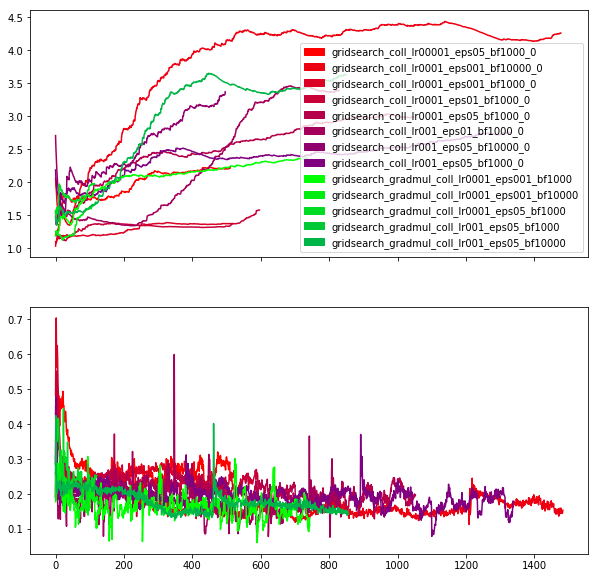

In [25]:
### CALCULATE ACUMULATED AVERAGE DISTANCE AND TRAINING LOSS
# f, ax = plt.subplots(len(info_tags), figsize=(10,10), sharex=True)
f, ax = plt.subplots(2, figsize=(10,10), sharex=True)

lr='01'
eps='05'
bfs='10000'
for k, t in enumerate(info_tags):
# for k, t in enumerate(['Distance_furthest_train_canyon', 'Loss_train_total']):
    print k,t
    legend_patches=[]
#     for j,m in enumerate(['gridsearch_depth_lr'+lr+'_eps'+eps+'_bf'+bfs+'_0',
#                           'gridsearch_depth_lr'+lr+'_eps'+eps+'_bf'+bfs+'_1',
#                           'gridsearch_depth_lr'+lr+'_eps'+eps+'_bf'+bfs+'_2']):
    for j,m in enumerate([m for m in models if m.startswith('gridsearch_coll')]):
#     for j in range(len(models)):
#         m={int(m.split('_')[-1]):m for m in models}[j]
        c=(1.-j/(len(models)+1.), 0., 0.+j/(len(models)+1.))
        legend_patches.append(mpatches.Patch(color=c, label=m))
        if len(information[m][t]) > 20 and (t=='Distance_furthest_train_canyon'):
            ys=[np.mean(information[m][t][0:i+1]) for i in range(5,len(information[m][t])-1)]
            ax[k].plot(ys,color=c)
            ax[k].legend(handles=legend_patches)
        else:
            ax[k].plot(information[m][t],color=c)
    for j,m in enumerate([m for m in models if m.startswith('gridsearch_gradmul')]):
#     for j in range(len(models)):
#         m={int(m.split('_')[-1]):m for m in models}[j]
        c=(0.,1.-j/(len(models)+1.), 0.+j/(len(models)+1.))
        legend_patches.append(mpatches.Patch(color=c, label=m))
        if len(information[m][t]) > 20 and (t=='Distance_furthest_train_canyon'):
            ys=[np.mean(information[m][t][0:i+1]) for i in range(5,len(information[m][t])-1)]
            ax[k].plot(ys,color=c)
            ax[k].legend(handles=legend_patches)
        else:
            ax[k].plot(information[m][t],color=c)
plt.show()


0 Distance_furthest_train_canyon
1 Loss_train_total


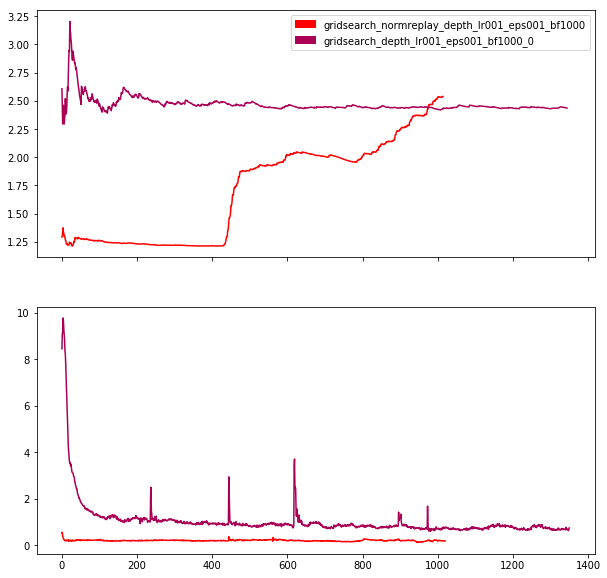

In [19]:
### CALCULATE ACUMULATED AVERAGE DISTANCE AND TRAINING LOSS
# f, ax = plt.subplots(len(info_tags), figsize=(10,10), sharex=True)
f, ax = plt.subplots(2, figsize=(10,10), sharex=True)

for k, t in enumerate(info_tags):
# for k, t in enumerate(['Distance_furthest_train_canyon', 'Loss_train_total']):
    print k,t
    legend_patches=[]
#     for j,m in enumerate(['gridsearch_depth_lr'+lr+'_eps'+eps+'_bf'+bfs+'_0',
#                           'gridsearch_depth_lr'+lr+'_eps'+eps+'_bf'+bfs+'_1',
#                           'gridsearch_depth_lr'+lr+'_eps'+eps+'_bf'+bfs+'_2']):
#     for j,m in enumerate([m for m in models if m.startswith('gridsearch_coll')]):
    for j,m in enumerate(['gridsearch_normreplay_depth_lr001_eps001_bf1000','gridsearch_depth_lr001_eps001_bf1000_0']):
#     for j in range(len(models)):
#         m={int(m.split('_')[-1]):m for m in models}[j]
        c=(1.-j/(2+1.), 0., 0.+j/(2+1.))
#         c=(1.-j/(len(models)+1.), 0., 0.+j/(len(models)+1.))
        legend_patches.append(mpatches.Patch(color=c, label=m))
        if len(information[m][t]) > 20 and (t=='Distance_furthest_train_canyon'):
            ys=[np.mean(information[m][t][0:i+1]) for i in range(5,len(information[m][t])-1)]
            ax[k].plot(ys,color=c)
            ax[k].legend(handles=legend_patches)
        else:
            ax[k].plot(information[m][t],color=c)
    
plt.show()

In [60]:
colors={'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}
colors[0]

TypeError: 'set' object does not support indexing

In [58]:
range(5,10)

[5, 6, 7, 8, 9]

In [31]:
m=models[0]
r=sorted([root_dir+'/'+m+'/'+r for r in os.listdir(root_dir+'/'+m) if r.startswith('2018') and r.endswith('train') and os.path.isfile(root_dir+'/'+m+'/'+r+'/tf_log')])[0]
tf_log=open(r+'/tf_log','r')
log_lines=tf_log.readlines()
tf_log.close()
for l in log_lines:
    if len(l.split(',')) > 3:
        info={e.split(':')[0][1:]:e.split(':')[1] for e in l.split(',')}
        print info['Distance_furthest_train_canyon']

2.5693019042
1.36723389201
1.30667324729
1.47226731435
2.60929875819
1.2908888309
2.97938777616
1.58894011626
1.31846224285
2.31522659316
1.35343382335
1.79249867788
1.79001107706
2.99375750731
2.58559805412
2.65544740895
1.40255920127
0.897453291304
1.78362106487
1.23065521134
1.37151454118
0.952463277329
2.12465163945
1.79383174347
2.18022820237
1.9201745898
1.49020295714
1.35272122246
1.88878845478
1.00273344555
1.30194487277
3.55285048429
2.06343414875
1.55555699797
1.10794126604
3.25378520716
1.39280071202
3.60036371069
2.88280098671
2.73684161736
2.11630965735
1.64150816752
1.30434502989
1.14686224929
1.34526301333
1.71573887765
3.52682873754
1.35159511563
2.18541978182
1.5578047841
2.82272943031
1.87264776187
1.03744032695
2.17955137639
1.82010809711
1.67856742876
1.73312407891
1.30989392787
1.03356705856
1.45421703059
1.69860574247
1.36223397921
1.43666602499
3.23501834353
1.39251642291
2.12470372358
1.91012994349
1.15173029488
1.19629051729
0.991133620675
1.59729794864
1.13435